In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [16]:
import os

directory = '/content/drive/MyDrive/B22_Toon/Diabetes/Test-model/'
print(os.listdir(directory))  # This will print the contents of the directory

['model.h5', 'complete_model.h5', 'diabetic-retinopathy.ipynb', 'sample-image-2.png', 'sample-image-1.png', 'sample-image-0.png', 'sample-image-3.png', 'sample-image-4.png', 'test-images', 'Test-Model.ipynb', 'complete_model-01.h5', 'w_model.h5']


In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
# Load the saved model
model = load_model('/content/drive/MyDrive/B22_Toon/Diabetes/Test-model/complete_model-01.h5')

In [29]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np
import cv2
#img_path = '/content/drive/MyDrive/B22_Toon/Diabetes/Test-model/sample-image-0.png'
#img = image.load_img(img_path, target_size=(224, 224))
#img_array = image.img_to_array(img)
#img_array = np.expand_dims(img_array, axis=0)

img = cv2.imread('/content/drive/MyDrive/B22_Toon/Diabetes/Test-model/test-images/si-4-2.png')
X = cv2.resize(img, (224, 224))
X = X / 255.0
X = np.expand_dims(X, axis=0)

In [30]:
predictions = model.predict(X)
predictions

1/1 [==============================] - 0s 107ms/step


array([[0.00667357, 0.00061497, 0.45882863, 0.31386885, 0.22001387]],
      dtype=float32)

In [32]:
# Assuming predictions is a 2D array with shape (1, num_classes)
class_indices = np.argmax(predictions, axis=1)
class_label = class_indices[0]

# You may have a dictionary mapping class indices to class labels
class_labels = {0: "No DR", 1: "Mild", 2: "Moderate", 3: "Severe",4: "Proliferative DR"}

predicted_label = class_labels[class_label]

print("Predicted label:", predicted_label)

Predicted label: Moderate


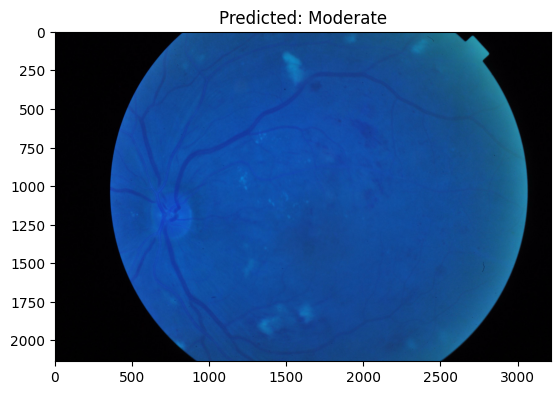

In [33]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title("Predicted: {}".format(predicted_label))
plt.show()